Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [132]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv('../smiple reg/delivery_time.csv')
df.head()   ## Delivery Time is independent and Sorting Time is dependent variable 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Delivery Time    0
Sorting Time     0
dtype: int64
Delivery Time range:  21.0
Sorting Time range:  8


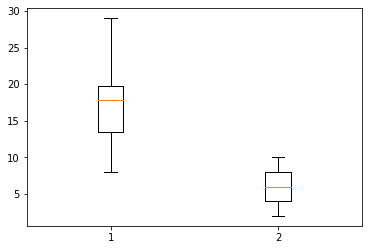

In [83]:
## Performing exploratory data analysis

# understanding the variables
print(df.isnull().sum()) ## Check for null values

print('Delivery Time range: ',np.ptp(df['Delivery Time']))
print('Sorting Time range: ',np.ptp(df['Sorting Time']))

plt.boxplot(df)
plt.show() ## boxplot shows no outliers detected in the given dataset

<AxesSubplot:xlabel='Delivery Time', ylabel='Count'>

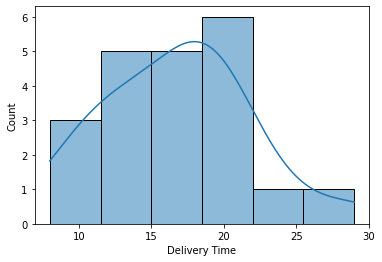

In [85]:
import seaborn as sns
sns.histplot(df['Delivery Time'],kde=True)

Coefficient:  [[0.37120067]]
Intercept value:  [0.1374478]
MSE: 1.1378667090877579
RMSE: 1.0667083524036727
MAE: 0.8431622695241282
R2: 0.8354891504933362


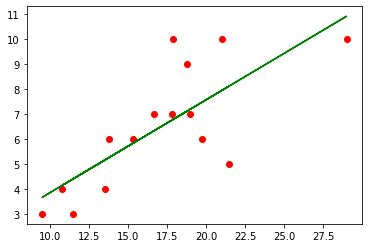

In [103]:
model1 = LinearRegression()
X = np.array(df['Delivery Time'])
y = np.array(df['Sorting Time'])
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

model1.fit(X_train,y_train)

predictions = model1.predict(X_test)

# Calculate the MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate the R2
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Coefficient: ',model1.coef_)
print('Intercept value: ',model1.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model1.predict(X_train),color='green')

Coefficient:  [0.74106455]
Intercept value:  0.07247133817300129
MSE: 0.18489285877218145
RMSE: 0.429991696166544
MAE: 0.33987994337848054
R2: 0.8354891504933365


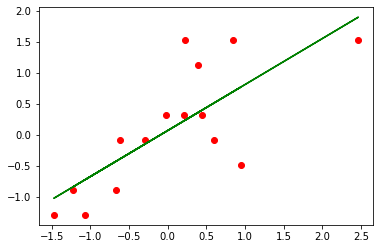

In [96]:
## Normalising data before fitting the model
del_time = np.array(df['Delivery Time'])
sort_time = np.array(df['Sorting Time'])

del_mean = np.mean(del_time)
del_std = np.std(del_time)
sort_mean = np.mean(sort_time)
sort_std = np.std(sort_time)

norm_del = (del_time-del_mean)/(del_std)
norm_sort = (sort_time-sort_mean)/(sort_std)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(norm_del.reshape(-1, 1), norm_sort, test_size=0.25,random_state=1)

# Create a linear regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
predictions = model2.predict(X_test)

# Calculate the MSE RMSE and R2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)


# Print the evaluation metrics
print('Coefficient: ',model2.coef_)
print('Intercept value: ',model2.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model2.predict(X_train),color='green')

Build a prediction model for Salary_hike

In [113]:
salary_df = pd.read_csv('../smiple reg/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Null values
YearsExperience    0
Salary             0
dtype: int64
Years of experience range:  9.4
Salary range:  84660.0


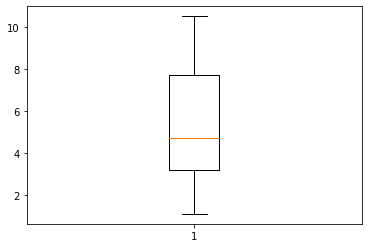

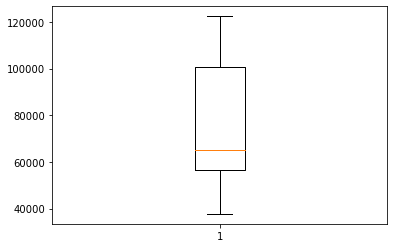

In [275]:
## Performing exploratory data analysis

# understanding the variables
print('Null values')
print(salary_df.isnull().sum()) ## Check for null values

print('Years of experience range: ',np.ptp(salary_df['YearsExperience']))
print('Salary range: ',np.ptp(salary_df['Salary']))

for col in salary_df.columns:

    plt.boxplot(salary_df[col])
    plt.show() ## boxplot shows no outliers detected in the given dataset

Coefficient:  [9261.56845302]
Intercept value:  25892.305719071206
MSE: 5215.55372271297
RMSE: 72.21879064836914
MAE: 5215.55372271297
R2: 0.9180980074804028


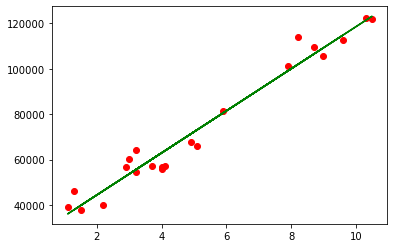

In [119]:
model_a = LinearRegression()

X = np.array(salary_df['YearsExperience'])
y = np.array(salary_df['Salary'])

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

model_a.fit(X_train,y_train)

predictions = model_a.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model_a.coef_)
print('Intercept value: ',model_a.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model_a.predict(X_train),color='green')

Coefficient:  [0.95873945]
Intercept value:  -0.03342381800693605
MSE: 0.19350083104049498
RMSE: 0.4398872935656303
MAE: 0.19350083104049498
R2: 0.9180980074804029


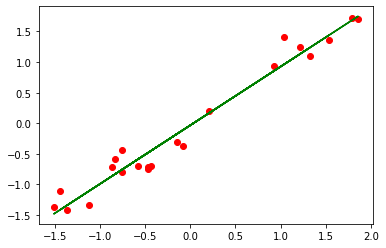

In [126]:
model_b = LinearRegression()

X = np.array(salary_df['YearsExperience'])
y = np.array(salary_df['Salary'])



X_norm = (X - X.mean())/(X.std())
y_norm = (y - y.mean())/(y.std())
X_train, X_test, y_train, y_test = train_test_split(X_norm.reshape(-1,1),y_norm,test_size=0.25,random_state=1)

model_b.fit(X_train,y_train)

predictions = model_b.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model_b.coef_)
print('Intercept value: ',model_b.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model_b.predict(X_train),color='green')

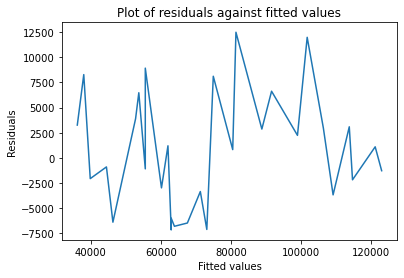

In [130]:
# Calculate the residuals
residuals = y - model_a.predict(X.reshape(-1,1))

# Create a plot of the residuals against the fitted values
plt.plot(model_a.predict(X.reshape(-1,1)), residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Plot of residuals against fitted values")
plt.show()


In [134]:
st.shapiro(residuals)

ShapiroResult(statistic=0.9529391527175903, pvalue=0.20252954959869385)

Logistic Regression

Whether the client has subscribed a term deposit or not 

In [186]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder


In [148]:
df = pd.read_csv('../log reg/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [161]:
## Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


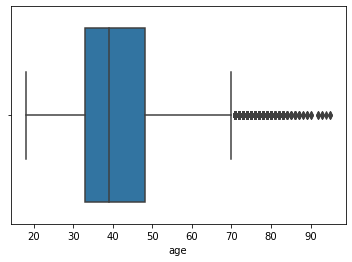

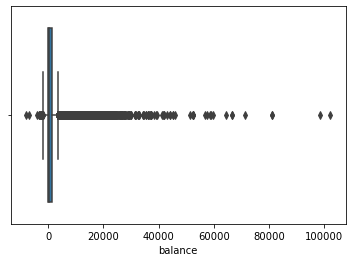

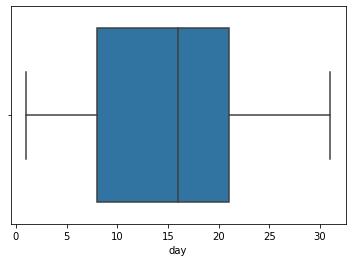

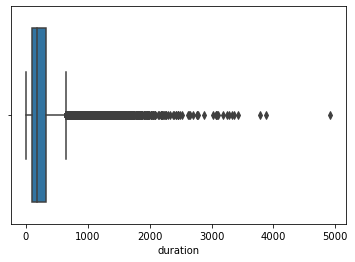

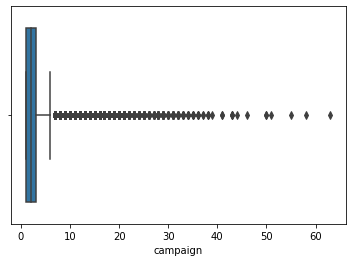

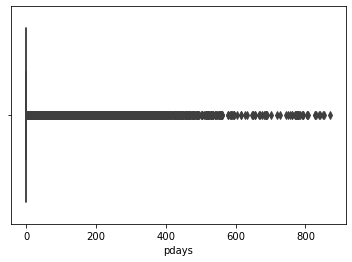

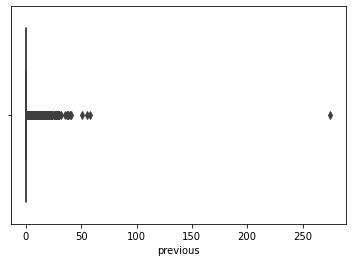

In [212]:
for col in df.columns:
    try:
        sns.boxplot(x=col, data=df)
        plt.show()
    except:
        pass

In [268]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

encoder = LabelEncoder()

for i in X.columns:
    if X[i].dtype == np.object:
        X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AUC: 0.5930962054479861


0.8901176678757852

In [258]:
## Now removing the outliers to see how the model is performing
filtered_data = df
for col in df.columns:
    if df[col].dtypes == 'int64':
        q1 = filtered_data[col].quantile(0.25)
        q3 = filtered_data[col].quantile(0.75)
        iqr = q3 - q1

        # Calculate the lower and upper bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify the outlier rows
        outlier_rows = filtered_data[(filtered_data[col] < lower_bound) | (filtered_data[col] > upper_bound)].index

        filtered_data = filtered_data.drop(outlier_rows)
        filtered_data.reset_index()

In [259]:
filtered_data.shape

(28069, 17)

In [260]:
X = filtered_data[filtered_data.columns[:-1]]
y = filtered_data[filtered_data.columns[-1]]

encoder = LabelEncoder()

for i in X.columns:
    if X[i].dtype == np.object:
        X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AUC: 0.5295123148987609


0.9432886862353947

In [261]:
## Try other models to see if they learn better than logistic regression model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [267]:
svm_clf = SVC()

# Train the support vector machine classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, svm_preds)

print("AUC value for support vector machine:", auc_value)
accuracy = accuracy_score(y_test, svm_preds)
print('Accuracy score for SVM model: ',accuracy)
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
dt_preds = dt_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, dt_preds)

print("AUC value for decision tree:", auc_value)
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy score for SVM model: ',accuracy)

AUC value for support vector machine: 0.5
Accuracy score for SVM model:  0.9430037047591906
AUC value for decision tree: 0.6629321547295255
Accuracy score for SVM model:  0.926902251353662


In [272]:
## It seems SVM and Decision trees are performing better on this data
## normalising the data t see how models are performing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)
scaled_data

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25,random_state=1)
svm_clf = SVC()

# Train the support vector machine classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, svm_preds)

print("AUC value for support vector machine:", auc_value)
accuracy = accuracy_score(y_test, svm_preds)
print('Accuracy score for SVM model: ',accuracy)
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
dt_preds = dt_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, dt_preds)

print("AUC value for decision tree:", auc_value)
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy score for decision tree model: ',accuracy)

AUC value for support vector machine: 0.5816551816110348
Accuracy score for SVM model:  0.8946297443156684
AUC value for decision tree: 0.6840315189474676
Accuracy score for decision tree model:  0.8688843669822172


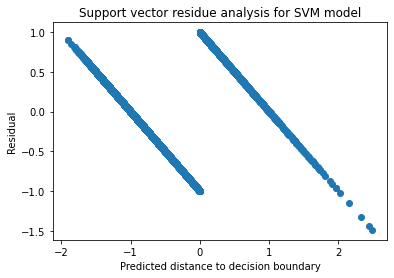

In [281]:
# Calculate the predicted distances to the decision boundary
y_pred = svm_clf.decision_function(scaled_data)

# Calculate the actual distances to the decision boundary
y_true = np.sign(y_pred)

# Calculate the residuals
residuals = y_true - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted distance to decision boundary")
plt.ylabel("Residual")
plt.title("Support vector residue analysis for SVM model")
plt.show()

In [ ]:

# Calculate the residuals
residuals = clf.decision_function(X_test) - y_test

# Perform a Shapiro-Wilk test on the residuals
stat, pvalue = st.shapiro(residuals)

# Print the p-value
print("p-value:", pvalue)


In [279]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [282]:
import numpy as np
from sklearn.svm import SVC

# Create an SVM classifier with a very high regularization parameter
clf = SVC(C=1e9)

# Train the classifier
clf.fit(X_train, y_train)

# Calculate the predicted distances to the decision boundary
y_pred = clf.decision_function(X_test)

# Calculate the actual distances to the decision boundary
y_true = np.sign(y_pred)

# Calculate the residuals
residuals = y_true - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)

# Plot a line for the actual y values
plt.plot([min(y_pred), max(y_pred)], [min(residuals), max(residuals)], color="red")

# Label the axes
plt.xlabel("Predicted distance to decision boundary")
plt.ylabel("Residual")

# Title the plot
plt.title("Support vector residue analysis for SVM model with high regularization")

# Show the plot
plt.show()
